In [2]:
%matplotlib inline
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from data_prep import *


plt.style.use('ggplot')

### Import all vaccine data
There is data published for kindergarteners, sixth graders, and the entire age range. I tended to look primarily at the kindergarten data, but have access to all data.

In [3]:
all45 = read_vaccine_data('data/2014_15_All_Grades')
k45 = read_vaccine_data('data/2014_15_Kindergarten')
six45 = read_vaccine_data('data/2014_15_6th_Grade')
all56 = read_vaccine_data('data/2015_16_All_Grades')
k56 = read_vaccine_data('data/2015_16_Kindergarten')
six56 = read_vaccine_data('data/2015_16_6th_Grade')
all67 = read_vaccine_data('data/2016_17_All_Grades')
k67 = read_vaccine_data('data/2016_17_Kindergarten')
six67 = read_vaccine_data('data/2016_17_6th_Grade')
all_demographic_data = read_demographic_data('data/Report_Card_Enrollment_from_2014-15_to_Current_Year.csv')

### Import all demographic data
Read the entire demographic csv and filter it out by school year and to only include data at the school level. There is also data at the district level, ESD level, and state level, but they were aggregated from the school data. These are the final three years available in csv prior to the publication of the dashboard.

In [6]:
demographics45 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2014-15') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()
demographics56 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2015-16') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()
demographics67 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2016-17') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()

### Pull out all kindergarten information
Most vaccines are required before starting kindergarten, so I assumed that all exemptions would have been taken by this point. I also imported sixth grade data for future analysis.

In [8]:
kindergarten45 = all_kindergarten(demographics45)
kindergarten45 = convert_to_fractions(kindergarten45)
kindergarten56 = all_kindergarten(demographics56)
kindergarten56 = convert_to_fractions(kindergarten56)
kindergarten67 = all_kindergarten(demographics67)
kindergarten67 = convert_to_fractions(kindergarten67)

six45 = all_sixth(demographics45)
six45 = convert_to_fractions(six45)
six56 = all_sixth(demographics56)
six56 = convert_to_fractions(six56)
six67 = all_sixth(demographics67)
six67 = convert_to_fractions(six67)

### Merge datatables

In [11]:
merged_kindergarten_data_45 = pd.merge(k45,kindergarten45, how='left',left_index=True, right_index=True)
merged_kindergarten_data_56 = pd.merge(k56,kindergarten56, how='left',left_index=True, right_index=True)
merged_kindergarten_data_67 = pd.merge(k67,kindergarten67, how='left',left_index=True, right_index=True)
merged_sixth_data_45 = pd.merge(k45,kindergarten45, how='left',left_index=True, right_index=True)
merged_sixth_data_56 = pd.merge(k56,kindergarten56, how='left',left_index=True, right_index=True)
merged_sixth_data_67 = pd.merge(k67,kindergarten67, how='left',left_index=True, right_index=True)

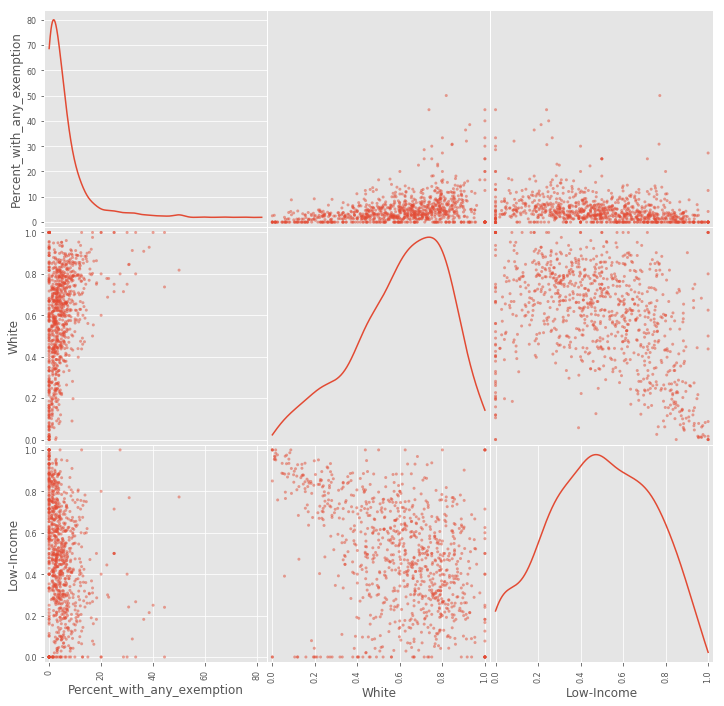

In [14]:
fig = pd.plotting.scatter_matrix(merged_kindergarten_data_45[['Percent_with_any_exemption','White','Low-Income']], alpha=0.5, figsize=(12, 12), diagonal='kde');

''

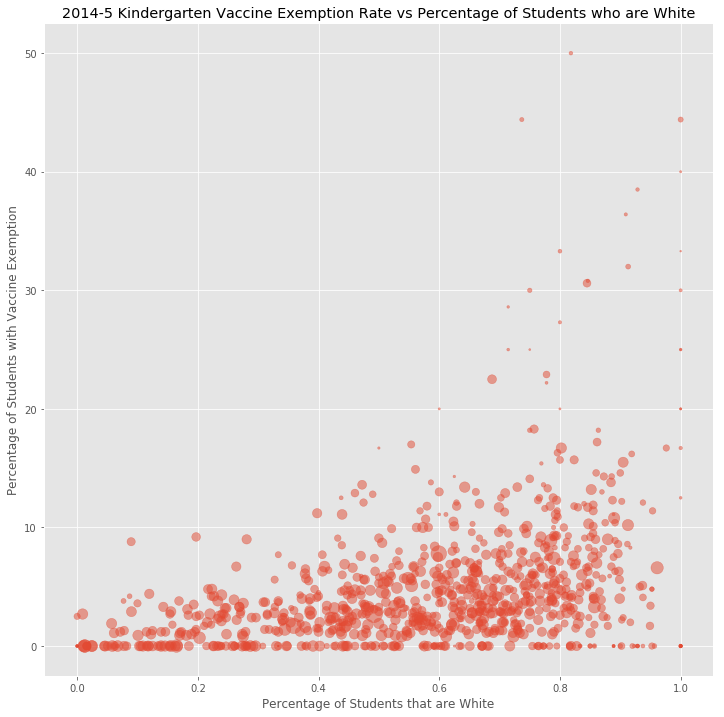

In [37]:
fig = plt.figure(figsize = (12,12))
plt.scatter(merged_kindergarten_data_45['White'], merged_kindergarten_data_45['Percent_with_any_exemption'], s = merged_kindergarten_data_45['Enrollment'], alpha = .5)
plt.xlabel("Percentage of Students that are White")
plt.ylabel("Percentage of Students with Vaccine Exemption")
plt.title('2014-5 Kindergarten Vaccine Exemption Rate vs Percentage of Students who are White')
;

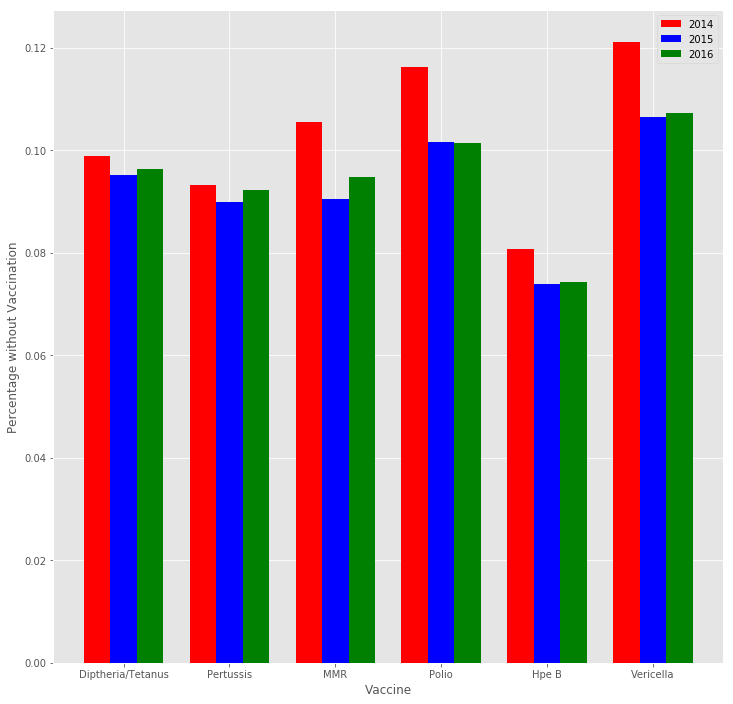

In [262]:
vaccines = {'Diptheria/Tetanus': 'Number_incomplete_for_diphtheria_tetanus', 'Pertussis': 'Number_incomplete_for_pertussis','MMR': 'Number_incomplete_for_measles_mumps_rubella','Polio': 'Number_incomplete_for_polio', 'Hpe B': 'Number_incomplete_for_HepatitisB', 'Vericella': 'Number_incomplete_for_varicella'}        
dataframes = [merged_kindergarten_data_45, merged_kindergarten_data_56, merged_kindergarten_data_67]
years = [2014, 2015, 2016]
data_2014, data_2015, data_2016 = [], [], []
data_years = [data_2014, data_2015, data_2016]
colors = ['red', 'blue', 'green']

ind = np.arange(len(vaccines))
width = 0.25

fig, ax = plt.subplots(figsize=(12,12))

for i, df_year in enumerate(dataframes): #three years
    for j, (name, column) in enumerate(vaccines.items()): #six vaccines
        data_years[i].append(df_year[column].sum()/df_year['Enrollment'].sum())
        plt.bar(j+(i-.5) * width, data_years[i][j], width, label=years[i], color = colors[i])

plt.xticks(ind + width/2, vaccines.keys())
plt.xlabel('Vaccine')
plt.ylabel('Percentage without Vaccination')

from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());